In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(1, 1, (3,1), activation=['linear', 'linear'])

In [ ]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by) 

wx =  [[0.8175596]]  wh =  [[-1.]]  bh =  [0.]  wy = [[-0.00238979]] by =  [0.]


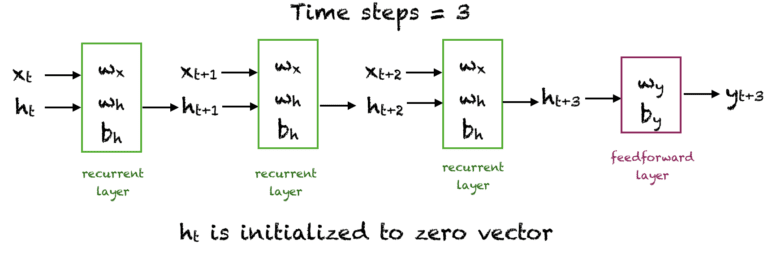




In [ ]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
print(x_input.shape)
y_pred_model = demo_model.predict(x_input)


m = 1
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

(1, 3, 1)
h1 =  [[0.8175596]] h2 =  [[0.8175596]] h3 =  [[1.6351192]]
Prediction from network  [[-0.00390759]]
Prediction from our computation  [[-0.00390759]]


#Running-The-RNN-On-Sunspots-Dataset


1. Read the dataset from a given URL
2. Split the data into training and test set
3. Prepare the input to the required Keras format
4. Create an RNN model and train it
5. Make the predictions on training and test sets and print the root mean  
6. square error on both sets
7. View the result



##Step 1, 2: Reading Data and Splitting Into Train And Test

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

##Step 3: Reshaping Data For Keras

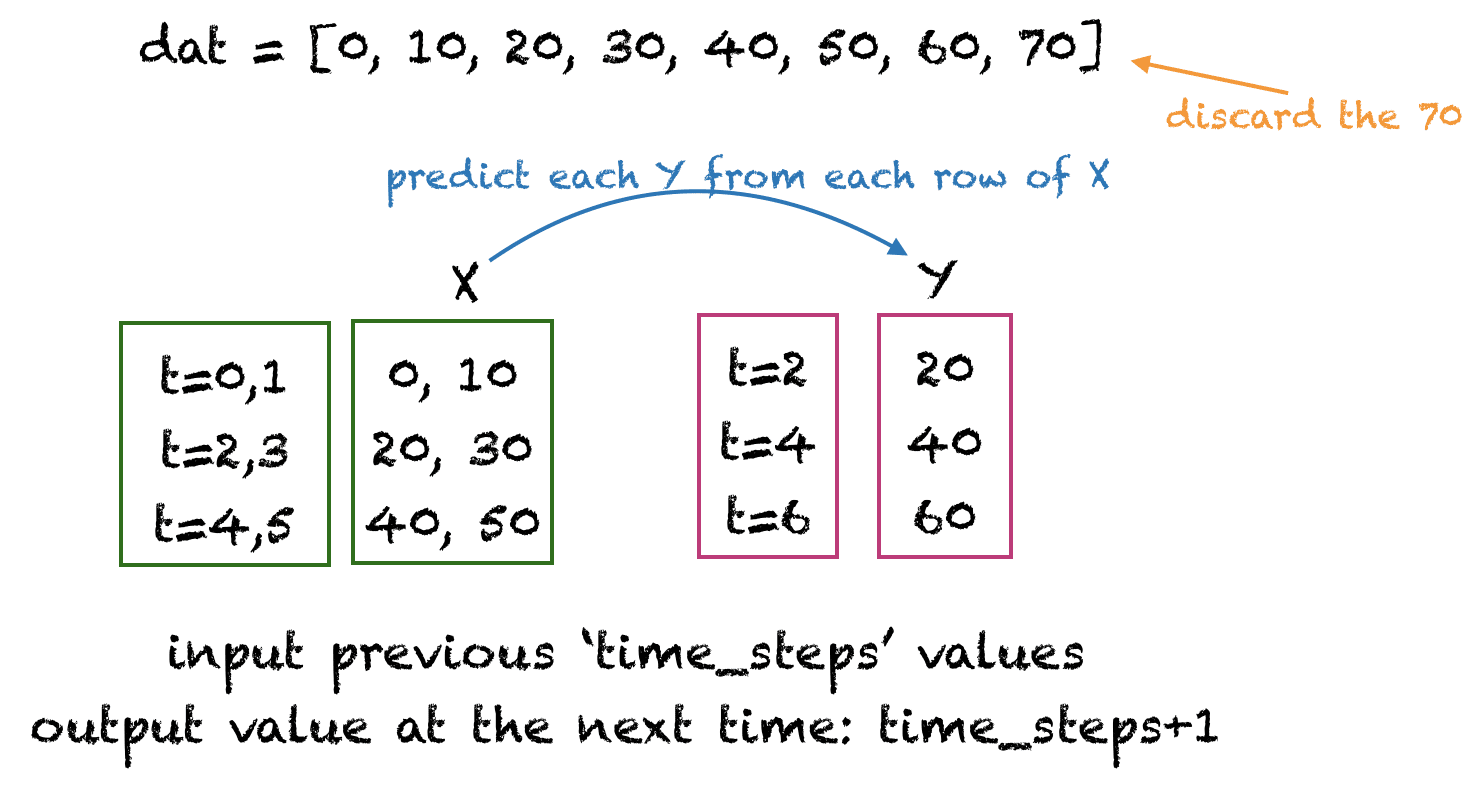

In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

[  12   24   36   48   60   72   84   96  108  120  132  144  156  168
  180  192  204  216  228  240  252  264  276  288  300  312  324  336
  348  360  372  384  396  408  420  432  444  456  468  480  492  504
  516  528  540  552  564  576  588  600  612  624  636  648  660  672
  684  696  708  720  732  744  756  768  780  792  804  816  828  840
  852  864  876  888  900  912  924  936  948  960  972  984  996 1008
 1020 1032 1044 1056 1068 1080 1092 1104 1116 1128 1140 1152 1164 1176
 1188 1200 1212 1224 1236 1248 1260 1272 1284 1296 1308 1320 1332 1344
 1356 1368 1380 1392 1404 1416 1428 1440 1452 1464 1476 1488 1500 1512
 1524 1536 1548 1560 1572 1584 1596 1608 1620 1632 1644 1656 1668 1680
 1692 1704 1716 1728 1740 1752 1764 1776 1788 1800 1812 1824 1836 1848
 1860 1872 1884 1896 1908 1920 1932 1944 1956 1968 1980 1992 2004 2016
 2028 2040 2052 2064 2076 2088 2100 2112 2124 2136 2148 2160 2172 2184
 2196 2208 2220 2232 2244]
[0.28881007 0.2758077  0.13790385 0.17336485 0.   

##Step 4: Create RNN Model And Train


In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 2s - loss: 0.0166 - 2s/epoch - 9ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0082 - 439ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0068 - 485ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0060 - 519ms/epoch - 3ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0057 - 492ms/epoch - 3ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0054 - 464ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0050 - 459ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0050 - 460ms/epoch - 2ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0048 - 525ms/epoch - 3ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0047 - 436ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0046 - 438ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0045 - 465ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0044 - 417ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0044 - 447ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0042 - 496ms/epoch - 3ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

##Step 5: Compute And Print The Root Mean Square Error


In [ ]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.064 RMSE
Test RMSE: 0.089 RMSE


##Step 6: View The result


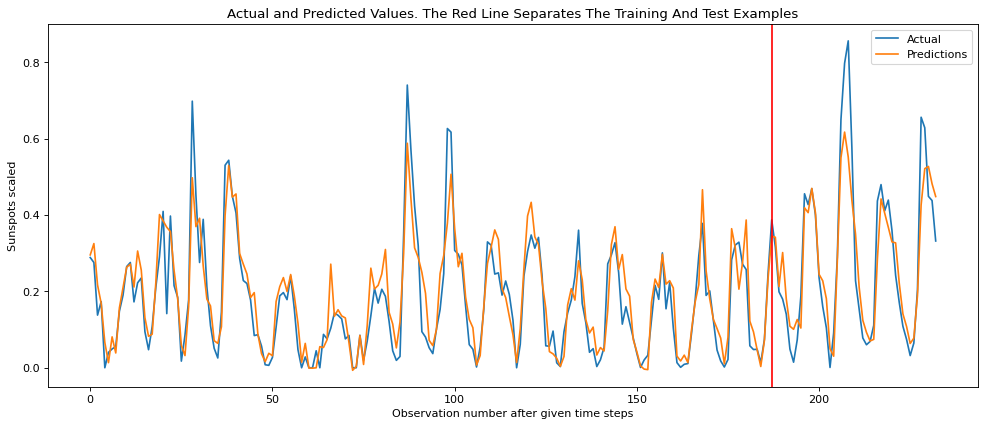

In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')


#Plot result
plot_result(trainY, testY, train_predict, test_predict)